Ham Spam Classification Using Classic NLP

In [1]:
#import libraries file

import numpy as np
import pandas as pd

In [2]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Kaggle/NLP/Email/spam.csv',encoding= 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Drop NAN Value

data.dropna(inplace=True, axis=1)

In [5]:
#Change Columns Name

data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [7]:
#Let's make a new column to detect how long the text messages are:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


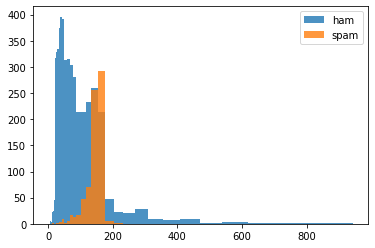

In [8]:
import matplotlib.pyplot as plt

bins = 1.15**(np.arange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = data['message']
y= data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=11)
X_train.shape

(3900,)

Data Preprocessing 

In [10]:

#Data Preprocessing for tokinezer and Stopwords data filtering

from sklearn.feature_extraction.text import CountVectorizer

Count_Vec = CountVectorizer()

X_train_counts = Count_Vec.fit_transform(X_train)

In [11]:
X_train_counts.shape

(3900, 7181)

In [12]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfv = TfidfTransformer()

X_train_tfidf = tfv.fit_transform(X_train_counts)


In [13]:
X_train_tfidf.shape

(3900, 7181)

If you not use CountVectorizer and TfidfTransformer then you can use TfidfVectorizer

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

text_clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC()),])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [16]:
pred = text_clf.predict(X_test)

In [17]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[1460    2]
 [  21  189]]


In [18]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1462
        spam       0.99      0.90      0.94       210

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672

